# **Telecommunication Customer Churn Analysis**

# **Introduction:**

Customer churn is a critical issue for businesses, especially in highly competitive industries like telecommunications. Churn refers to customers leaving a service provider, and understanding the factors that contribute to churn can help companies reduce it, improve customer retention, and increase profitability. This dataset contains various customer attributes and services they use, making it a valuable resource for analyzing churn behavior.


# **Problem Statement:**

Customer churn has a significant impact on a company's growth and profitability. The challenge lies in identifying key drivers that lead customers to leave and understanding how to prevent churn. The data includes demographic information, subscription details, and financial attributes. By analyzing these, we aim to uncover patterns that can help the company implement better retention strategies.


# **Objective:**

The objective of this analysis is to:

1. Identify the key factors influencing customer churn.
2. Understand the relationships between different variables (e.g., demographics, service usage, and contract type) and churn behavior.
3. Build a predictive model to determine the likelihood of customer churn based on the available data.
4. Provide actionable insights to help the company reduce churn rates and improve customer satisfaction.






# **Journey of Data Analysis:**

1. Import libraries
2. Data loading
3. Overview of the data
4. Data cleaning
5. Exploratory data analysis
6. Conclusion

## **1. Import Libraries**

In [38]:
pip install seaborn

In [2]:
pip install matplotlib

In [3]:
# Import useful libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## **2. Data Loading**

In [4]:
# Creating a path file
path= ('/content/Customer Churn.csv')

In [5]:
# Loading & Reading the csv file
df=pd.read_csv(path)

## **3. Overview of the Data**

In [6]:
# Overall Shape of the dataset (No. of rows and columns)
df.shape

(7043, 21)

In [7]:
# Checking duplicates in the dataset
df.duplicated().sum()

0

In [8]:
# Showing all column names in row form
pd.set_option('display.max_columns', None)

In [9]:
# Showing first 5 rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Showing Null values in the dataset
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
# Showing the Overall information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **4. Data Cleaning**

In [12]:
# Rename coulmns for easier to read
df.rename(columns={'gender':'Gender', 'tenure':'Tenure'},inplace=True)

In [13]:
# Remove any leading & trailing spaces
df.columns.str.strip()

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
# Add spaces before each uppercase letter
df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', ' ', regex=True)

In [15]:
df.columns

Index(['customer I D', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming T V', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [16]:
# Replace blank space with 0 number
df['Total Charges']= df['Total Charges'].replace(' ', '0')

In [17]:
# Convert into numeric column
df['Total Charges']= pd.to_numeric(df['Total Charges'])

In [18]:
# Repace 0 with 'No' and 1 with 'Yes'
df['Senior Citizen']= df['Senior Citizen'].replace(0, 'No')
df['Senior Citizen']= df['Senior Citizen'].replace(1, 'Yes')

In [19]:
df['Payment Method']= df['Payment Method'].replace('Bank transfer (automatic)','Bank Transfer')
df['Payment Method']= df['Payment Method'].replace('Credit card (automatic)','Credit Card')


In [20]:
# Rename columns for easier to read
df.rename(columns={'customer I D':'Customer ID', 'Streaming T V':'Streaming TV'},inplace=True)

In [21]:
# Overall information after Data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer ID        7043 non-null   object 
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [22]:
# Replace for easier to read and understand
df['Payment Method']= df['Payment Method'].replace('Bank Transfer (automatic)','Bank Transfer')
df['Payment Method']= df['Payment Method'].replace('Credit Card (automatic)','Credit Card')

## **5. Exploratory Data Visualization**

# **a) Churn Count & Gender (Count plot):**

The bar chart shows the number of customers who have stayed (No) versus those who have left (Yes), separated by gender.

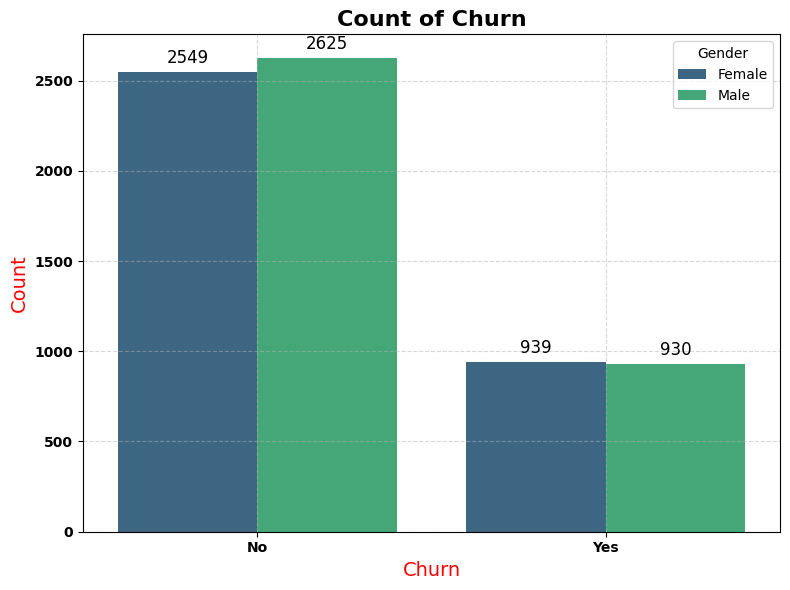

In [23]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a countplot
countplot = sns.countplot(data=df, x='Churn', hue='Gender', palette='viridis')

# Customization: Add title, labels & gridline
plt.title('Count of Churn', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=14, color='red')
plt.ylabel('Count', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Add data labels
for p in countplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        countplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **Analysis:**

The bar chart illustrates the churn rates of customers, categorized by gender. It reveals that more male customers (2,625) chose to stay compared to female customers (2,549). Conversely, the number of females (939) who left is slightly higher than the number of males (930).

This distribution indicates that while the overall churn rates are similar across genders, there is a marginal difference with males showing a slightly higher retention rate than females. This insight can be crucial for targeted customer retention strategies.

# **b) Churn Count & Contract (Count plot):**

This bar chart shows the distribution of customer churn across different contract types.

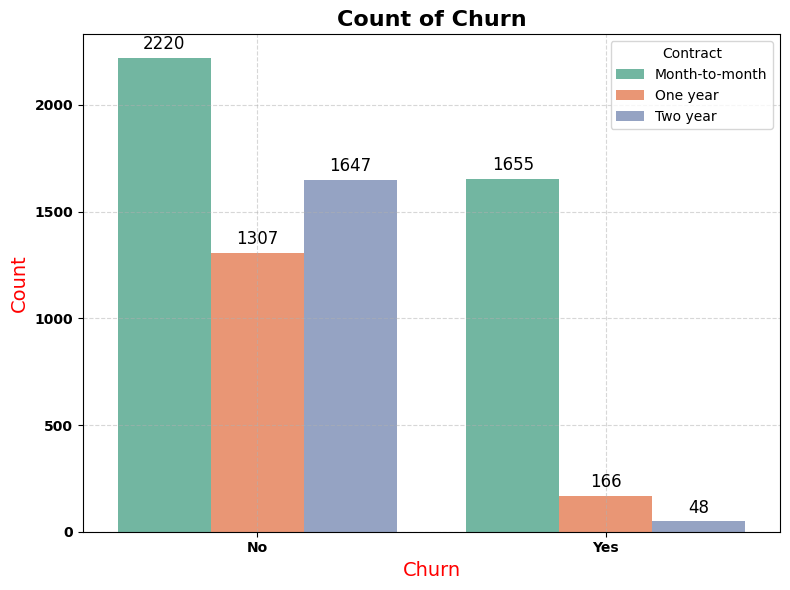

In [24]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a countplot
countplot = sns.countplot(data=df, x='Churn', hue='Contract', palette='Set2')

# Customization: Add title, labels & gridline
plt.title('Count of Churn', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=14, color='red')
plt.ylabel('Count', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Add data labels
for p in countplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        countplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **Analysis:**

The bar chart reveals that customers with month-to-month contracts have the highest churn rate, with 1655 out of 3875 customers leaving. Conversely, those with one-year and two-year contracts show significantly lower churn rates, highlighting a correlation between longer contract terms and customer retention.

This data suggests that offering longer contract durations could be an effective strategy for reducing customer churn.

# **c) Monthly Charges vs Contract & Churn (Bar plot):**

This bar chart shows the relationship between different contract types and monthly charges associated with customer churn.

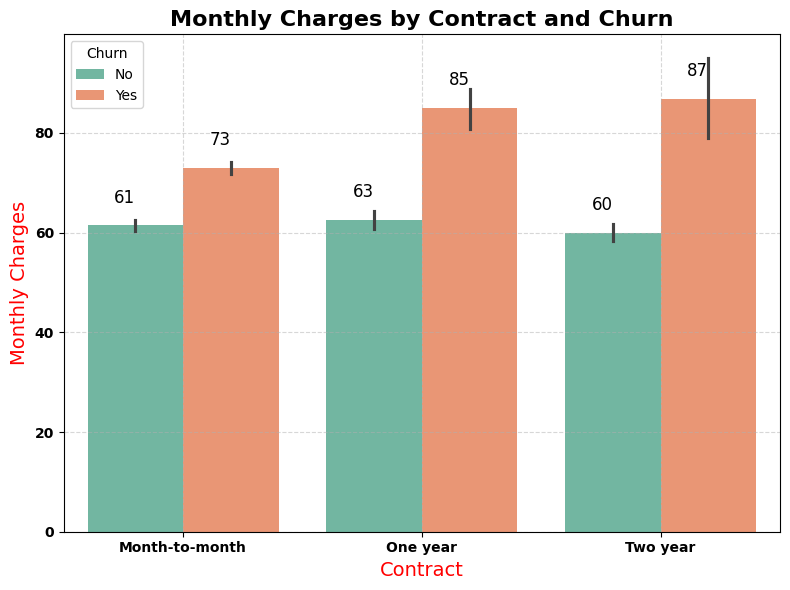

In [25]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a barplot
barplot = sns.barplot(data=df, x='Contract', y= 'Monthly Charges', hue='Churn', palette='Set2')

# Customization: Add title, labels & gridline
plt.title('Monthly Charges by Contract and Churn', fontsize=16, fontweight='bold')
plt.xlabel('Contract', fontsize=14, color='red')
plt.ylabel('Monthly Charges', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Customization: Add data labels
for p in barplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        barplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='right', va='center', xytext=(0,20),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **Analysis:**

This bar chart shows that customers on month-to-month, one-year, and two-year contracts who churn tend to have higher monthly charges compared to those who don't churn. The highest monthly charges are seen in churned customers with two-year contracts. This indicates a correlation between higher monthly charges and the likelihood of customer churn.

# **d) Payment Method Count & Churn (Count plot):**

This bar chart shows the number of customers using various payment methods and their churn status.

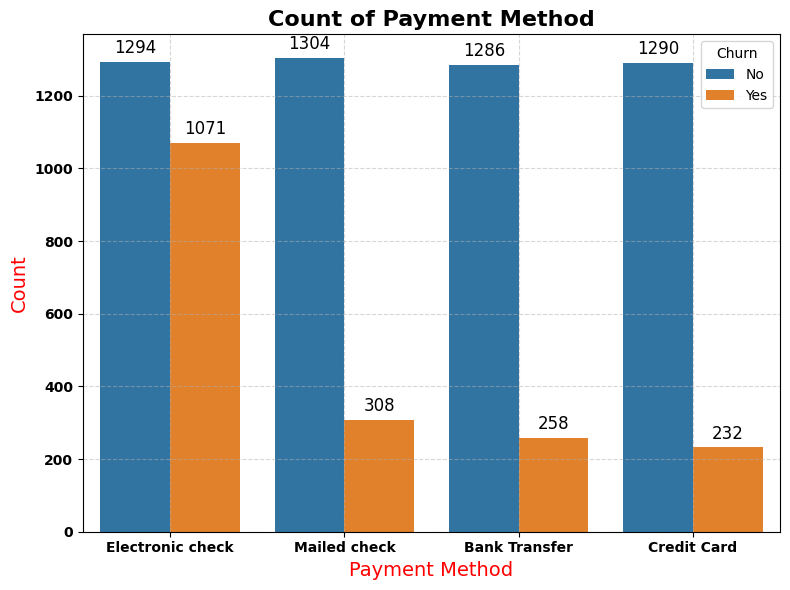

In [26]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a countplot
countplot = sns.countplot(data=df, x='Payment Method', hue='Churn')

# Customization: Add title, labels & gridline
plt.title('Count of Payment Method', fontsize=16, fontweight='bold')
plt.xlabel('Payment Method', fontsize=14, color='red')
plt.ylabel('Count', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Add data labels
for p in countplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        countplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **Analysis:**

The bar chart reveals that customers using electronic checks have the highest churn rate (1,071), whereas those using credit cards have the lowest (232). Mailed checks and bank transfers show moderate churn rates.

This indicates that payment method is a significant factor in customer retention, with electronic check users more likely to churn compared to other payment methods.

# **e) Senior Citizen Count & Churn (Count plot):**

This bar graph illustrates the churn rates among senior citizens (Yes) versus non-senior citizens (No).

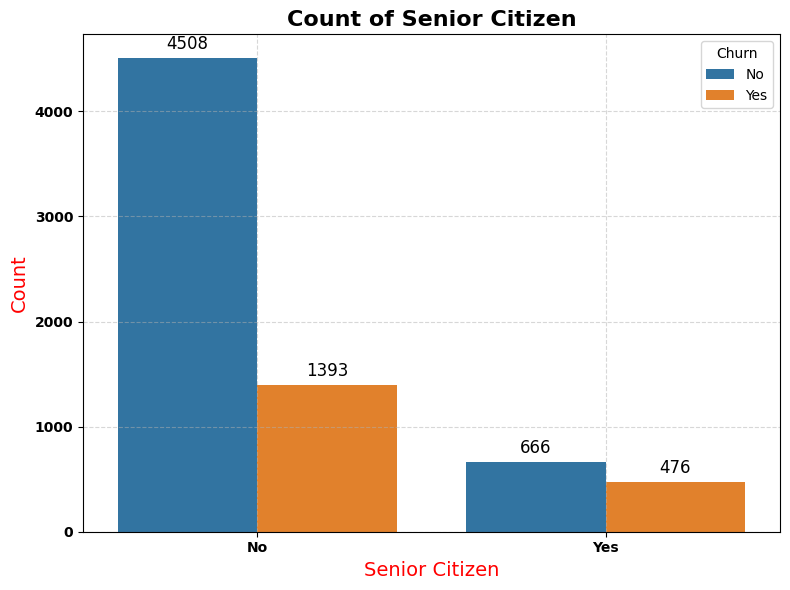

In [27]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a countplot
countplot = sns.countplot(data=df, x='Senior Citizen', hue='Churn')

# Customization: Add title, labels & gridline
plt.title('Count of Senior Citizen', fontsize=16, fontweight='bold')
plt.xlabel('Senior Citizen', fontsize=14, color='red')
plt.ylabel('Count', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Add data labels
for p in countplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        countplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# **Analysis:**

The bar chart reveals that non-senior citizens exhibit a significantly lower churn rate compared to senior citizens, with 1,393 non-senior citizens churning versus 476 senior citizens.

This indicates that senior citizens are more likely to leave, highlighting the importance of targeted retention strategies for this demographic.

# **f) Total Charges vs Contract & Churn (Bar plot):**

This bar chart illustrates the total charges incurred by customers, categorized by contract type and whether they churned.

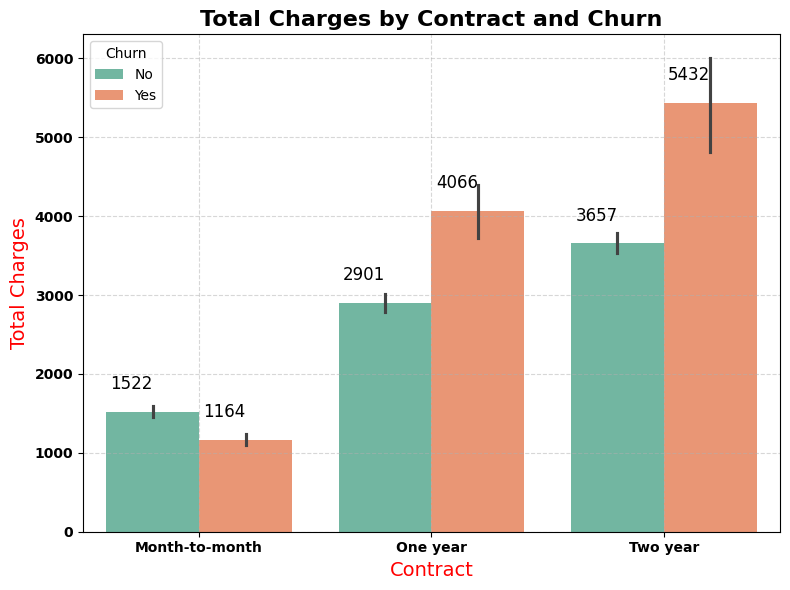

In [28]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a barplot
barplot = sns.barplot(data=df, x='Contract', y= 'Total Charges', hue='Churn', palette='Set2')

# Customization: Add title, labels & gridline
plt.title('Total Charges by Contract and Churn', fontsize=16, fontweight='bold')
plt.xlabel('Contract', fontsize=14, color='red')
plt.ylabel('Total Charges', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Customization: Add data labels
for p in barplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        barplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='right', va='center', xytext=(0,20),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# **Analysis:**

The bar chart shows that customers with longer contracts (one-year and two-year) tend to have higher total charges and lower churn rates compared to month-to-month contracts. Non-churned customers consistently have higher total charges, indicating that longer contracts and higher charges correlate with customer retention.

# **g) Multiple Count plots of Different Services:**

The series of bar charts compare customer churn across different services: Phone Service, Multiple Lines, Internet Service, Online Security, Online Backup, and Device Protection.

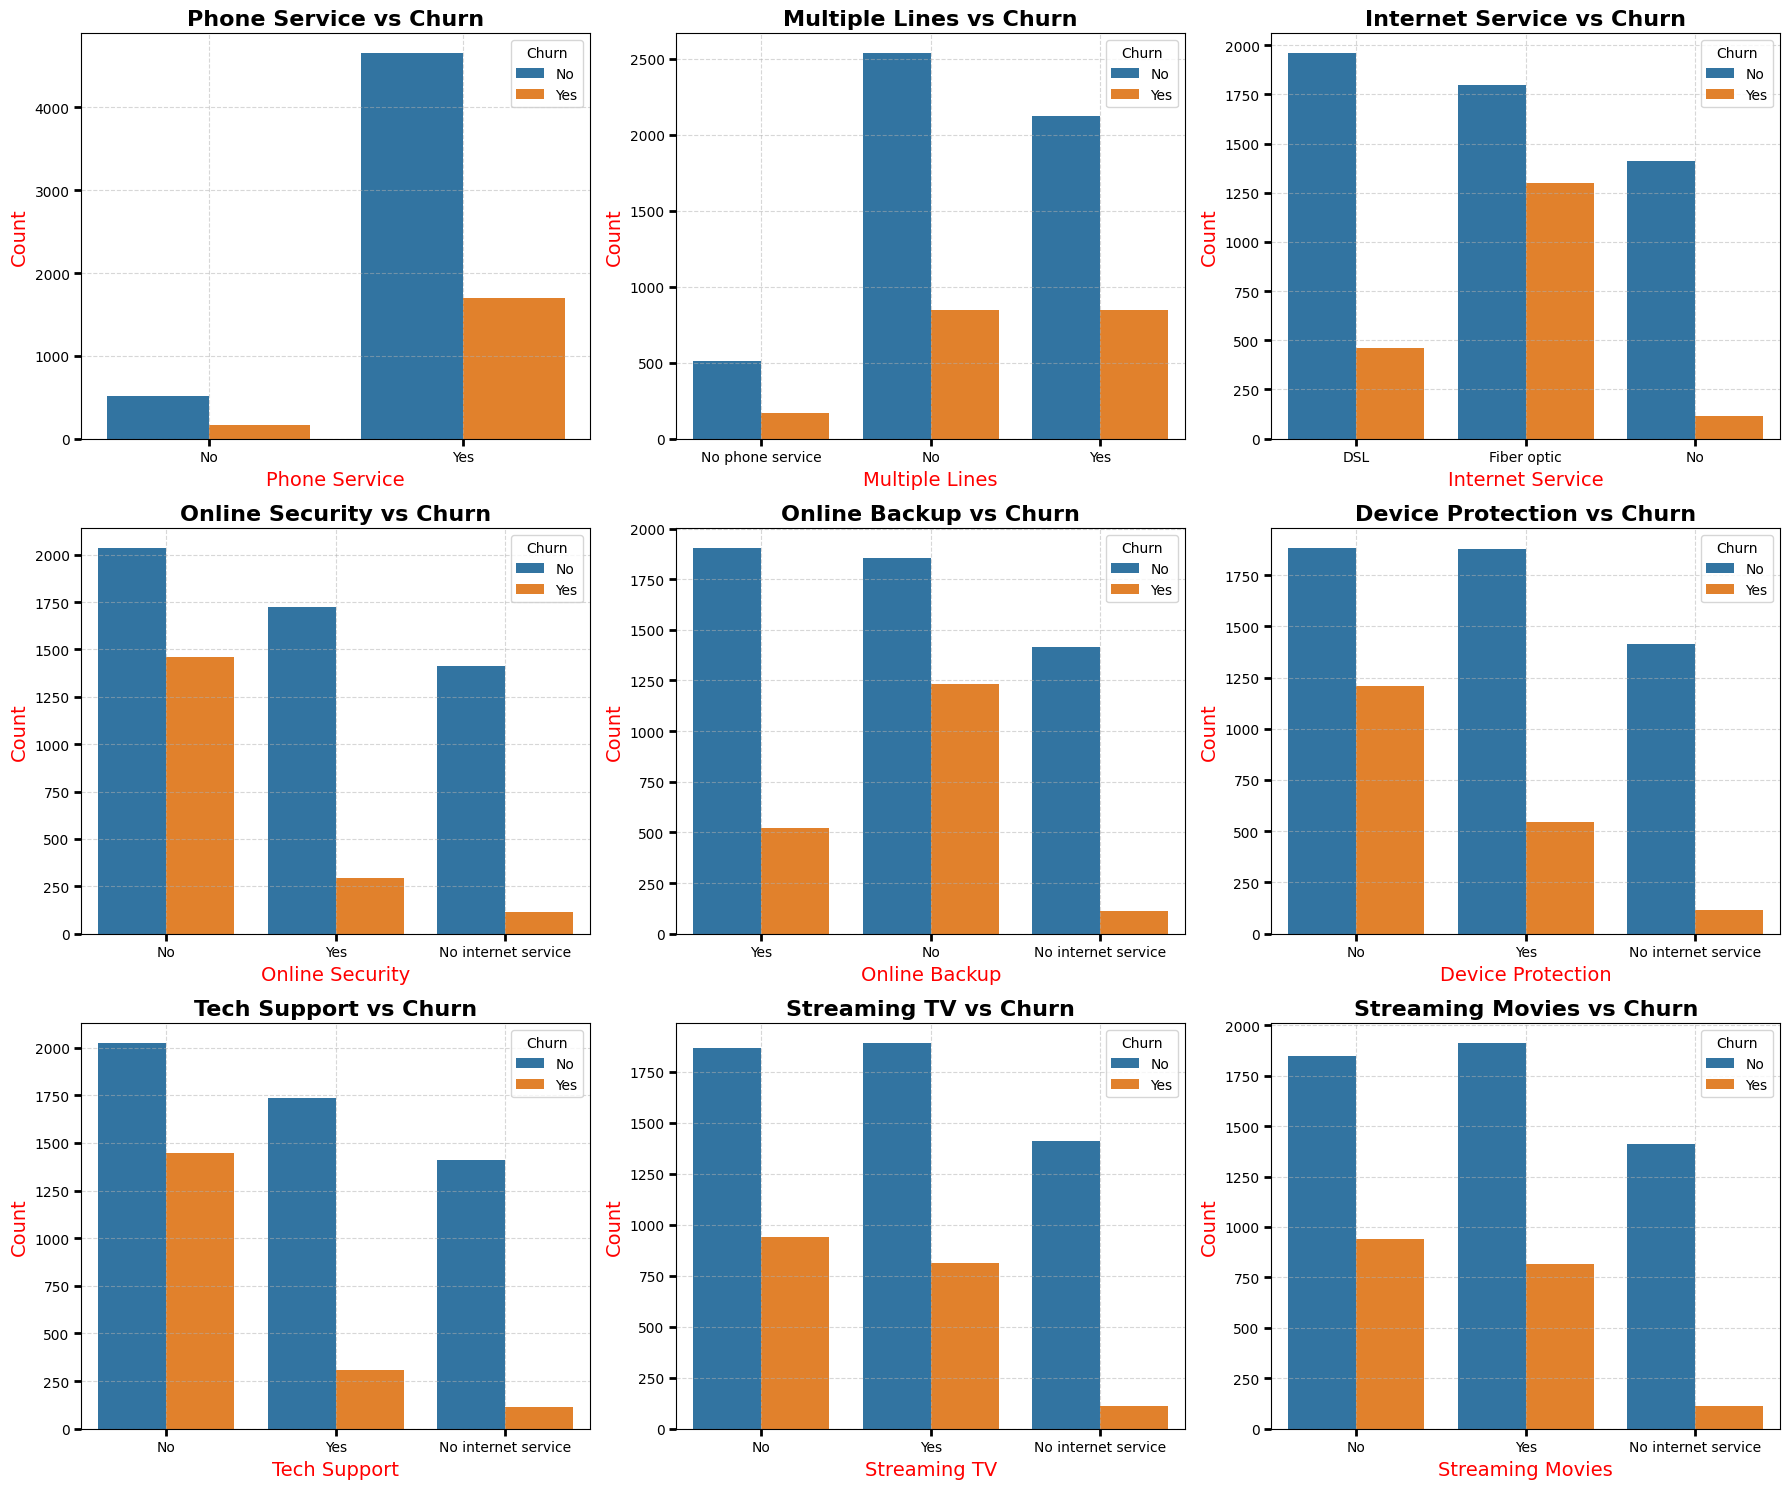

In [29]:
# List of columns to plot
columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
           'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']

# Set up the figure and axes for subplots (3 rows x 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Create a countplot for each column
for i, col in enumerate(columns):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Churn')

 # Customization: Add title, labels, and gridlines for each subplot
    axes[i].set_title(f'{col} vs Churn', fontsize=16, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=14, color='red')
    axes[i].set_ylabel('Count', fontsize=14, color='red')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].tick_params(axis='x', labelsize=10, labelrotation=0, width=2, labelcolor='black', length=5)
    axes[i].tick_params(axis='y', labelsize=10, width=2, labelcolor='black', length=5)

# Show the plot
plt.tight_layout()
plt.show()

# **Analysis:**

The bar charts highlight that customers with phone services, online security, backup, and device protection are more likely to stay, while those with fiber optic internet are more prone to churn. This suggests that providing reliable internet and additional security services can improve customer retention.

# **h) Tenure vs Gender & Churn (Bar plot):**

This bar chart depicts the average tenure of customers categorized by gender (Female and Male) and their churn status (Yes or No).


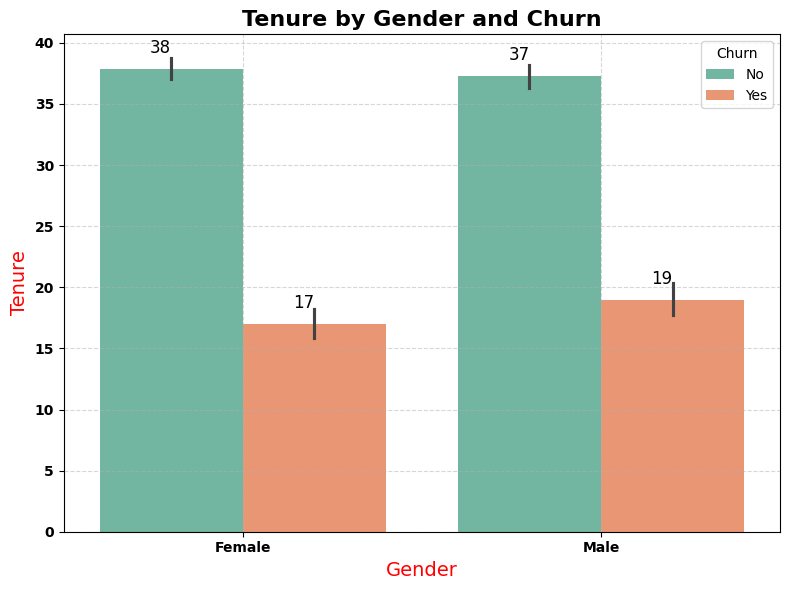

In [30]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a barplot
barplot = sns.barplot(data=df, x='Gender', y= 'Tenure', hue='Churn', palette='Set2')

# Customization: Add title, labels & gridline
plt.title('Tenure by Gender and Churn', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14, color='red')
plt.ylabel('Tenure', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Customization: Add data labels
for p in barplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        barplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='right', va='center', xytext=(0,15),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# **Analysis:**

The bar chart shows that both female and male customers who haven't churned have much longer tenures (38 and 37 months, respectively) compared to those who have churned (17 and 19 months). This highlights a strong correlation between longer customer tenure and lower churn rates.

# **i) Monthly Charges vs Churn (Box plot):**

This box plot compares the monthly charges of customers who have churned (left the service) versus those who have not.

<ipython-input-31-7fdfa19fb61f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Monthly Charges', data=df, palette="Set2", linewidth=2.5)


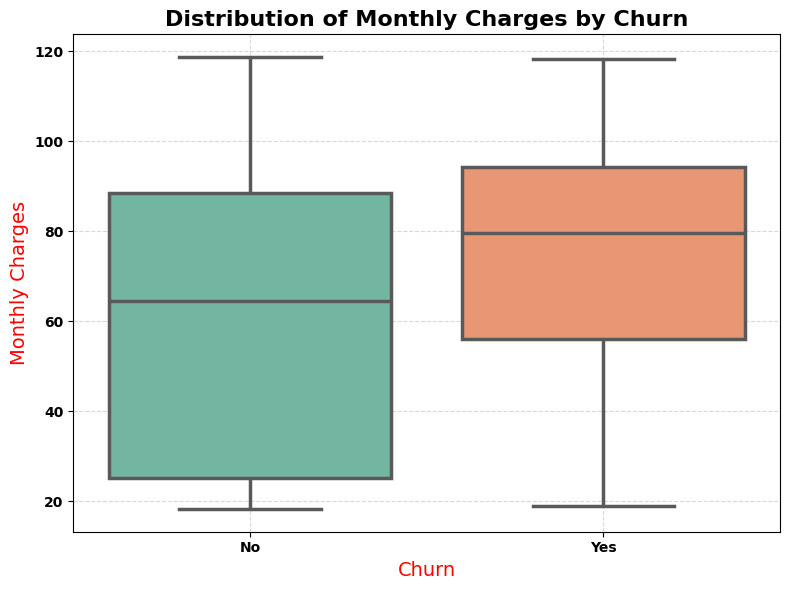

In [31]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create the Boxplot
sns.boxplot(x='Churn', y='Monthly Charges', data=df, palette="Set2", linewidth=2.5)

# Customization: Add title, label & gridline
plt.title('Distribution of Monthly Charges by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Churn', fontsize=14, color='red')
plt.ylabel('Monthly Charges', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# Show the plot
plt.tight_layout()
plt.show()



# **Analysis:**

The box plot shows that customers who churn have higher monthly charges, with a median of 80 dollar , compared to 60 dollar for those who stay. This suggests that higher monthly charges may lead to higher churn rates.

# **j) Relationship b/w Total Charges & Monthly Charges (Scatter plot):**

This scatter plot depicts the relationship between customers' total charges and their monthly charges, color-coded by churn status.

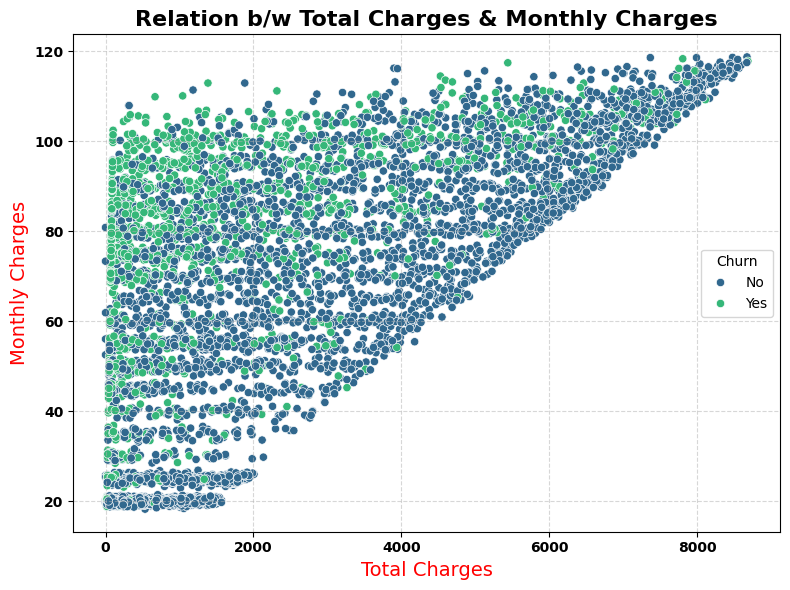

In [32]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a Scatter plot
sns.scatterplot(data=df, x='Total Charges', y='Monthly Charges', hue='Churn',sizes=(20,100), palette='viridis')

# Customization: Add title, label & gridline
plt.title('Relation b/w Total Charges & Monthly Charges',fontsize=16, fontweight='bold')
plt.xlabel('Total Charges', fontsize=14, color='red')
plt.ylabel('Monthly Charges', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.legend(title='Churn', loc='center right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()





# **Analysis:**

The scatter plot shows a positive correlation between Total Charges and Monthly Charges. Customers with higher Monthly Charges tend to have higher Total Charges. Notably, churned customers (green) are more common at higher Monthly Charges, indicating a possible link between higher charges and increased churn rates.

# **k) Distribution of Tenure by Churn (Histogram):**

This histogram shows how long customers stay (in months) and whether they churn (leave) or stay.

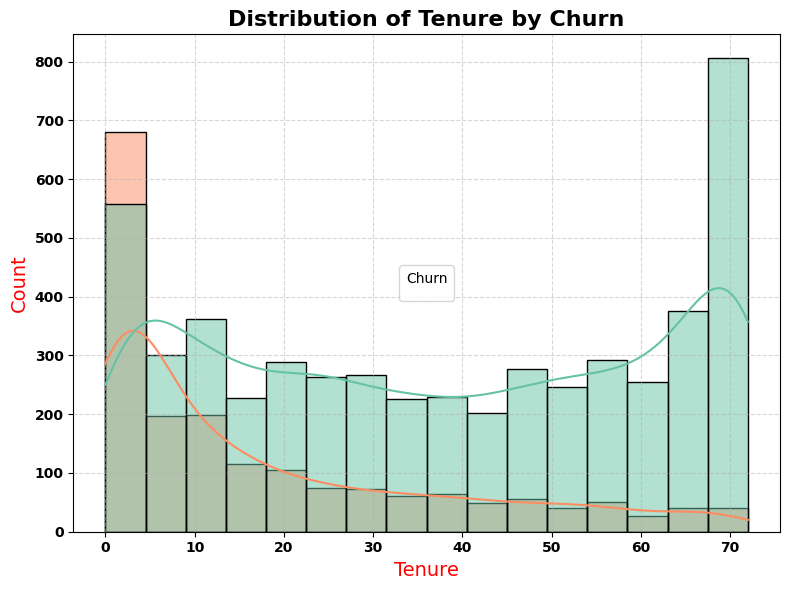

In [33]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a Histogram
sns.histplot(data=df, x='Tenure', hue='Churn', kde=True, palette='Set2')

# Customization: Add title, label & gridline
plt.title('Distribution of Tenure by Churn', fontsize=16, fontweight='bold')
plt.xlabel('Tenure', fontsize=14, color='red')
plt.ylabel('Count', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')
plt.legend(title='Churn', loc='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# **Analysis:**

The histogram reveals that customers with shorter tenures (0-10 months) are more likely to churn, whereas customers with longer tenures (around 70 months) tend to stay. This highlights the importance of focusing on customer retention strategies, particularly for those within their first year.

# **l) Relation b/w Monthly Charges, Total Charges & Tenure (Heatmap):**

The correlation heatmap visualizes the relationships between Monthly Charges, Total Charges, and Tenure.

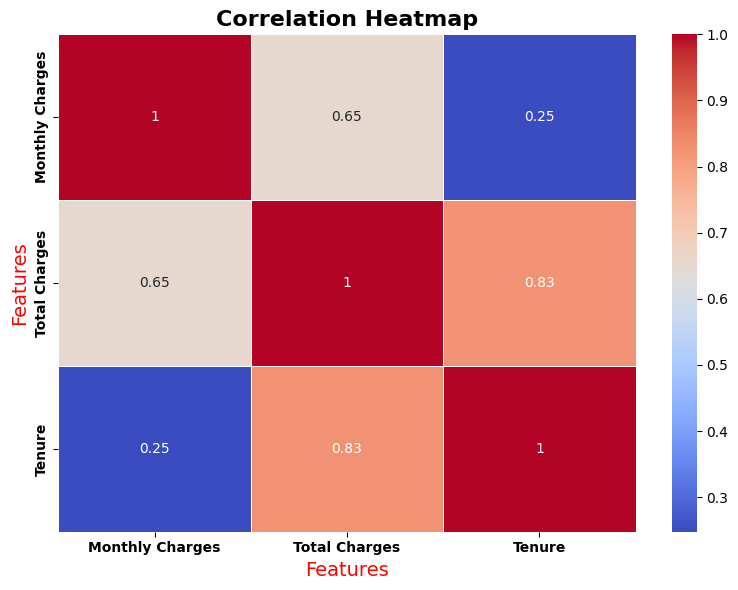

In [34]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a Heatmap
sns.heatmap(df[['Monthly Charges', 'Total Charges', 'Tenure']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)

# Customization: Add title, label & gridline
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xlabel('Features', fontsize=14, color='red')
plt.ylabel('Features', fontsize=14, color='red')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# Show the plot
plt.tight_layout()
plt.show()

# **Analysis:**

The correlation heatmap reveals that Total Charges and Tenure have the strongest correlation (0.83), indicating a significant increase in total charges as tenure increases. Monthly Charges and Total Charges show a moderate positive correlation (0.65), while Monthly Charges and Tenure have a weaker correlation (0.25). This visualization helps understand how these features are related, providing valuable insights for further analysis or decision-making.

# **m) Monthly Charges, Total Charges & Tenure**: **(Pairplot)**

The graph shows the relationships between Monthly Charges, Total Charges, and Tenure for customers, categorized by whether they churned (left) or stayed.


<Figure size 1200x1000 with 0 Axes>

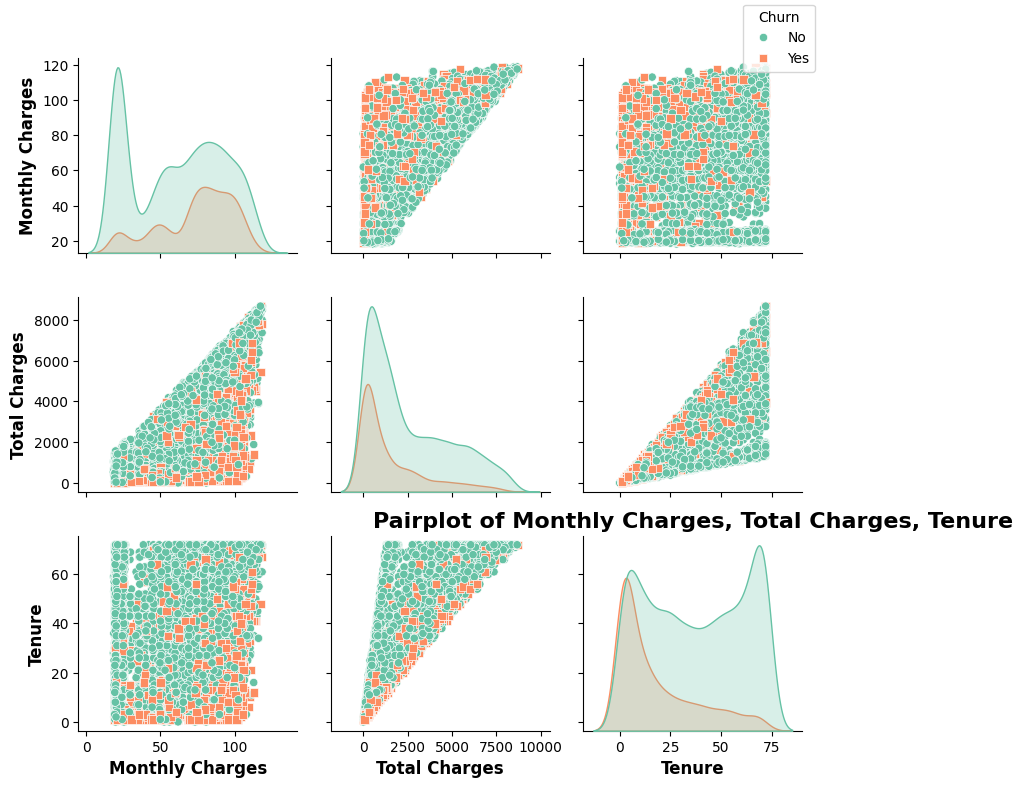

In [35]:
# Set plot size
plt.figure(figsize=(12, 10))

# Create a pairplot
pairplot = sns.pairplot(df[['Monthly Charges', 'Total Charges', 'Tenure', 'Churn']], hue='Churn', palette='Set2', diag_kind='kde', markers=['o', 's'])

# Customize subplots: Add titles and axis labels
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12, color='black', weight='bold')
    ax.set_ylabel(ax.get_ylabel(), fontsize=12, color='black', weight='bold')
    ax.set_title(ax.get_title(), fontsize=14, weight='bold')
    plt.title('Pairplot of Monthly Charges, Total Charges, Tenure', fontsize=16, weight='bold')

# Improve legend
pairplot._legend.set_title('Churn')
pairplot._legend.set_bbox_to_anchor((1, 1))
pairplot._legend.set_frame_on(True)

# Customize x-ticks & y-ticks
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# Show the plot
plt.tight_layout()
plt.show()


# **Analysis:**

*1. Monthly vs. Total Charges:*

*   As Monthly Charges increase, Total Charges also increase.
*   Non-churned customers tend to have higher Total Charges.


*2. Monthly Charges vs. Tenure:*



*   No clear pattern between Monthly Charges and how long customers stay.
*  Churned customers often have shorter tenures.

*3. Total Charges vs. Tenure:*




*  As Tenure increases, Total Charges rise.
*  Churned customers usually have lower Total Charges.


*Key Insights:*
1. Churned Customers: More likely to have lower Total Charges and shorter Tenures.

2. Non-Churned Customers: Generally have higher Total Charges and longer Tenures.

# **n) Paperless Billing Count & Churn (Count plot):**

The bar chart displays the distribution of customers who opted for paperless billing and their churn status.

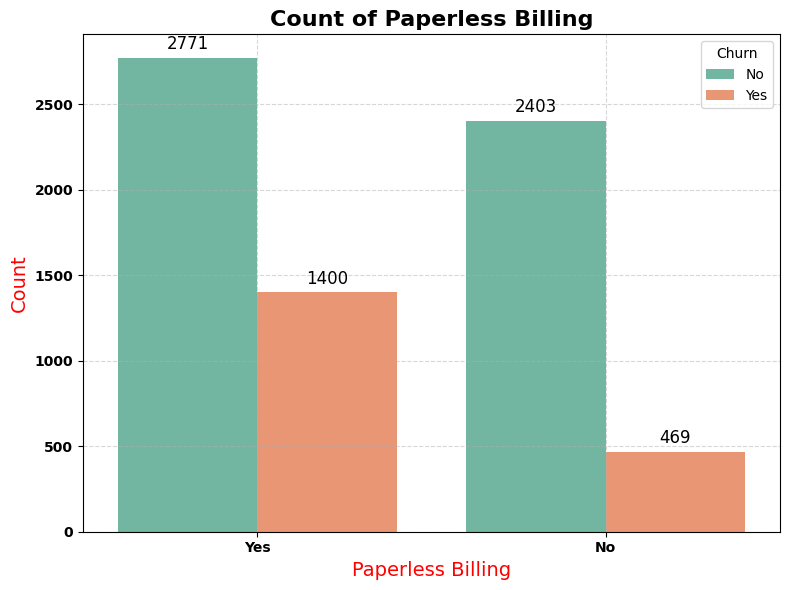

In [36]:
# Set the plot size
plt.figure(figsize=(8, 6))

# Create a countplot
countplot = sns.countplot(data=df, x='Paperless Billing', hue='Churn', palette='Set2')

# Customization: Add title, labels & gridline
plt.title('Count of Paperless Billing', fontsize=16, fontweight='bold')
plt.xlabel('Paperless Billing', fontsize=14, color='red')
plt.ylabel('Count', fontsize=14, color='red')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10, fontweight= 'bold')
plt.yticks(fontsize=10, fontweight= 'bold')

# Add data labels
for p in countplot.patches:
    if p.get_height() > 0:  # Only add labels to bars with height greater than 0
        countplot.annotate(format(p.get_height(), '.0f'),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center', xytext=(0, 10),
                           textcoords='offset points', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


# **Analysis:**

The bar chart shows that customers who chose paperless billing are less likely to churn, with 2771 staying and 1400 leaving, compared to 2403 staying and 469 leaving among those who did not choose paperless billing. This indicates a potential positive impact of paperless billing on customer retention.

# **Conclusion:**

The customer churn analysis reveals that senior citizens, customers on month-to-month contracts, and those paying higher monthly charges are more likely to leave. In contrast, customers with long-term contracts, automatic payments, and additional services like online security and tech support tend to stay longer. This indicates that loyalty can be improved by promoting long-term contracts, enhancing support services, and offering competitive pricing for high-cost services.

# **Action Plan:**

From a business perspective, the following actions are recommended to improve customer retention:

1. **Offer Incentives for Long-Term Contracts:**
Implement discounts or benefits for customers who commit to longer contracts, especially targeting demographics more prone to churn, such as senior citizens.

2. **Enhance Value of Internet Services:**
Address higher churn among fiber optic users by offering additional bundled services or exclusive discounts for fiber customers.

3. **Promote Security and Support Services:**
Encourage the adoption of online security and tech support by bundling them with internet packages or offering introductory trials, as these services are associated with better retention.

4. **Re-evaluate Pricing for High-Spending Customers:**
Consider offering loyalty discounts or value-added services to customers with high monthly charges to reduce the likelihood of churn due to cost.

5. **Focus on Automatic Payment Methods:**
Encourage the use of bank transfers or credit card payments, especially for long-term contracts, as these methods correlate with lower churn rates.

These actions, focused on contract length, service quality, and pricing strategies, can help reduce churn and enhance long-term customer loyalty.